<a href="https://colab.research.google.com/github/RagaaM/Scriba/blob/main/classification_using_VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path="/content/drive/MyDrive/dataset"
test_path="/content/drive/MyDrive/dataset"
val_path="/content/drive/MyDrive/dataset"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [5]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [6]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [9]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [10]:
training_set.class_indices

{'.ipynb_checkpoints': 0, 'test': 1, 'train': 2, 'val': 3}

In [11]:
train_y.shape,test_y.shape,val_y.shape

((80,), (80,), (80,))

In [12]:
#vgg = VGG19(input_shape =(224,224,3), weights='imagenet', include_top=False)
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [13]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [14]:
x = Flatten()(vgg.output)

In [15]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [19]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=12,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)


Epoch 1/12
3/3 [==============================] - 106s 41s/step - loss: 2.2887 - accuracy: 0.5000 - val_loss: 0.9294 - val_accuracy: 0.6000
Epoch 2/12
3/3 [==============================] - 100s 40s/step - loss: 1.5194 - accuracy: 0.3875 - val_loss: 1.0562 - val_accuracy: 0.4625
Epoch 3/12
3/3 [==============================] - 101s 40s/step - loss: 1.4046 - accuracy: 0.4750 - val_loss: 1.4539 - val_accuracy: 0.6000
Epoch 4/12
3/3 [==============================] - 100s 40s/step - loss: 1.2330 - accuracy: 0.6375 - val_loss: 0.9919 - val_accuracy: 0.4625
Epoch 5/12
3/3 [==============================] - 100s 40s/step - loss: 1.0191 - accuracy: 0.4875 - val_loss: 0.8018 - val_accuracy: 0.6375
Epoch 6/12
3/3 [==============================] - 100s 40s/step - loss: 0.7807 - accuracy: 0.6875 - val_loss: 0.6863 - val_accuracy: 0.6750
Epoch 7/12
3/3 [==============================] - 100s 40s/step - loss: 0.6565 - accuracy: 0.6875 - val_loss: 0.5829 - val_accuracy: 0.8250
Epoch 8/12
3/3 [====

In [20]:
model.evaluate(test_x,test_y,batch_size=32)

3/3 [==============================] - 50s 15s/step - loss: 0.3860 - accuracy: 0.8875


[0.38601183891296387, 0.887499988079071]

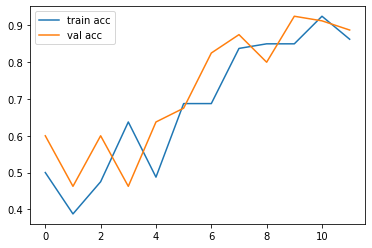

In [21]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

              precision    recall  f1-score   support

           1       0.65      1.00      0.79        13
           2       1.00      0.84      0.91        57
           3       0.83      1.00      0.91        10

    accuracy                           0.89        80
   macro avg       0.83      0.95      0.87        80
weighted avg       0.92      0.89      0.89        80

[[13  0  0]
 [ 7 48  2]
 [ 0  0 10]]
